In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [30]:
df = pd.read_csv(r'D:\Virtual Internship\Health Dataset\dim_test.csv')

In [31]:
df

,test_key,test_name,test_code,specimen,ct_ref,test_desc
0,10002,Pus for Fungus,1988,PUS,BSH,Desc
1,10003,Drain Fluid for Bilirubin,00885,FLUID,BSH,Desc
2,10004,NASAL SWAB FOR KLB,0705,Not Found,BSH,Desc
3,10005,X-Pert MTB/RIF assay by archived gastric Aspi...,0706,TRACHEAL ASPIRATE,BSH,Desc
4,10006,Anti-Filaria Ab IgG4,0192,BLOOD,BSH,Desc
...,...,...,...,...,...,...
1130,10011,Pleural Fluid for Malignant Cell,1486,PLEURAL FLUID,BSH,A malignant pleural effusion (MPE) is the buil...
1131,10693,FBG - Fasting blood glucose,0031,BLOOD,SNOMED CT,Desc
1132,10453,RBG - Random blood glucose,0030,BLOOD,SNOMED CT,Desc
1133,10259,Blood calcium level,0237,BLOOD,SNOMED CT,Desc


In [13]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="healthdb",
                                           user = "postgres",
                                           password = "Justdoit007",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [26]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO public.hospital(hospital_key, hospital_name ,branch_name  ,hospital_type,"\
" email  ,website ,address, geo_code ,city ,upazila,district ,division)" \
            " VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, df.values)
con.commit()
cur.close()

Connection to DB established!


In [38]:
df = pd.read_csv(r'D:\Virtual Internship\Health Dataset\fact_sales.csv')

In [39]:
df

,_id,pik,time_key,geo_key,hospital_key,lab_key,test_key,sales_price
0,1,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10003,10490,1030
1,2,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10043,10156,1210
2,3,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10043,10257,430
3,4,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10043,10822,1210
4,5,F1926jvorfrrglahvcrnouosvspqsp,20190708,204667,100001,10043,10899,480
...,...,...,...,...,...,...,...,...
92078,92079,M2018xvncrvcrnouoosrrvvn,20200301,302650,100001,10051,10531,1100
92079,92080,M2018xvncrvcrnouoosrrvvn,20200301,302650,100001,10053,10157,850
92080,92081,M2018xvncrvcrnouoosrrvvn,20200301,302650,100001,10058,10617,310
92081,92082,M2018xwrrefhpplrnounruupuws,20190911,207585,100001,10048,10655,400


In [33]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO public.test(test_key, test_name ,test_code, specimen, ct_ref, test_desc)" \
            " VALUES (%s, %s, %s, %s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, df.values)
con.commit()
cur.close()

Connection to DB established!


In [40]:
con = PostgresConnection().getConnection()
insert_stmt = "INSERT INTO public.fact_sales(id, pik,  time_key, geo_key, hospital_key, lab_key, test_key ,"\
" sales_price) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, df.values)
con.commit()
cur.close()

Connection to DB established!


UniqueViolation: duplicate key value violates unique constraint "pk_6"
DETAIL:  Key (id, pik, time_key, hospital_key, test_key, lab_key, geo_key)=(1, F1926jvorfrrglahvcrnouosvspqsp, 20190708, 100001, 10490, 10003, 204667) already exists.


In [32]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT * FROM ecomdb_star_schema.trans_dim ORDER BY payment_key ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()

Connection to DB established!


In [33]:
res

[('P001', 'cash', 'NaN'),
 ('P002', 'card', 'AB Bank Limited'),
 ('P003', 'card', 'Bangladesh Commerce Bank Limited'),
 ('P004', 'card', 'Bank Asia Limited'),
 ('P005', 'card', 'BRAC Bank Limited'),
 ('P006', 'card', 'Citizens Bank Limited'),
 ('P007', 'card', 'City Bank Limited'),
 ('P008', 'card', 'Community Bank Bangladesh Limited'),
 ('P009', 'card', 'Dhaka Bank Limited'),
 ('P010', 'card', 'Dutch-Bangla Bank Limited'),
 ('P011', 'card', 'Eastern Bank Limited'),
 ('P012', 'card', 'IFIC Bank Limited'),
 ('P013', 'card', 'Jamuna Bank Limited'),
 ('P014', 'card', 'Meghna Bank Limited'),
 ('P015', 'card', 'Mercantile Bank Limited'),
 ('P016', 'card', 'Midland Bank Limited'),
 ('P017', 'card', 'Modhumoti Bank Limited'),
 ('P018', 'card', 'Mutual Trust Bank Limited'),
 ('P019', 'card', 'National Bank Limited'),
 ('P020', 'card', 'National Credit & Commerce Bank Limited'),
 ('P021', 'card', 'NRB Bank Limited'),
 ('P022', 'card', 'NRB Commercial Bank Ltd'),
 ('P023', 'card', 'NRB Global Ba

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [22]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT s.division, SUM(f.total_price) FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.store_dim s ON f.store_key = s.store_key GROUP BY s.division ORDER BY s.division ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25'))]

In [9]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Justdoit007",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [13]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT s.district, SUM(f.total_price) FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.store_dim s ON f.store_key = s.store_key GROUP BY s.district ORDER BY s.district ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [23]:
import pandas as pd
df_q1 = pd.DataFrame(res,columns = ['division', 'total_sales'])
df_q1

,division,total_sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [24]:
df_q1.dtypes

division       object
total_sales    object
dtype: object

In [25]:
def changetype(x):
    x['total_sales'] = x['total_sales'].astype('float64')
changetype(df_q1)
df_q1

,division,total_sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [26]:
df_q1.dtypes

division        object
total_sales    float64
dtype: object

<Axes: ylabel='total_sales'>

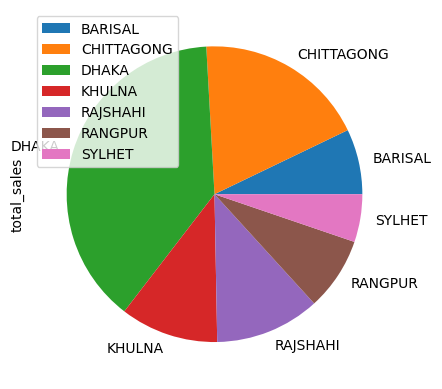

In [28]:
df_q1 = df_q1.set_index(['division'])
df_q1.plot.pie(y='total_sales')